<h1>PART 1 DATA LOADING</h1>

<h2>CELL 1 Notebook Title & Objective</h2>

In [1]:
# Heart Disease Risk Prediction System
# CHUB  Hospital
# Multi-Class Classification (5 Classes)
# Author: 25RP21640

<h2>CELL 2 Import Required Libraries</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

<h2>CELL 3 Load Dataset</h2>

In [3]:
df = pd.read_csv('data/heart_disease.csv')

<h2>CELL 4 Dataset Size</h2>

In [4]:
print(f"Total samples: {len(df)}")
print(f"Total features: {len(df.columns)}")
df.head()

Total samples: 5000
Total features: 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,38.871687,Male,Typical Angina,100.490248,163.166661,NaN,LV hypertrophy,183.658119,No,0.114644,Upsloping,0.0,Normal,no disease
1,60.625755,Male,Asymptomatic,NaN,338.711395,True,LV hypertrophy,141.161921,NaN,2.361526,Downsloping,2.0,NaN,severe
2,64.306898,Male,NaN,146.355656,337.004035,True,LV hypertrophy,NaN,Yes,2.660477,Downsloping,2.0,Reversible defect,severe
3,57.457313,Female,Non-Anginal Pain,NaN,260.116075,True,NaN,150.353969,Yes,1.145959,Flat,1.0,Reversible defect,mild
4,53.394739,Male,Non-Anginal Pain,129.763455,224.948879,False,LV hypertrophy,147.834030,Yes,NaN,Flat,NaN,Reversible defect,mild


<h1>PART 2 EDA (Exploratory Data Analysis)</h1>

<h2>CELL 5  One-line Missing Values</h2>

In [5]:
print(f"Total missing values per feature:\n{df.isnull().sum()}")

Total missing values per feature:
age              589
sex              582
cp               591
trestbps         601
chol             575
fbs              579
restecg          583
thalach          584
exang            595
oldpeak          593
slope            598
ca               589
thal             601
heart_disease      0
dtype: int64


<h2>CELL 6  Shape (Instances vs Features)</h2>

In [6]:
print(f"Number of instances (rows): {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")


Number of instances (rows): 5000
Number of features (columns): 14


<h2>CELL 7  Data Types (Only Features)</h2>

In [7]:
df.dtypes


age              float64
sex               object
cp                object
trestbps         float64
chol             float64
fbs               object
restecg           object
thalach          float64
exang             object
oldpeak          float64
slope             object
ca               float64
thal              object
heart_disease     object
dtype: object

<h2>CELL 8  Dataset Detailed Info</h2>

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4411 non-null   float64
 1   sex            4418 non-null   object 
 2   cp             4409 non-null   object 
 3   trestbps       4399 non-null   float64
 4   chol           4425 non-null   float64
 5   fbs            4421 non-null   object 
 6   restecg        4417 non-null   object 
 7   thalach        4416 non-null   float64
 8   exang          4405 non-null   object 
 9   oldpeak        4407 non-null   float64
 10  slope          4402 non-null   object 
 11  ca             4411 non-null   float64
 12  thal           4399 non-null   object 
 13  heart_disease  5000 non-null   object 
dtypes: float64(6), object(8)
memory usage: 547.0+ KB


<h2>CELL 9 Descriptive Statistics (Numerical)</h2>

In [9]:
df.describe()


,age,trestbps,chol,thalach,oldpeak,ca
count,4411.000000,4399.000000,4425.000000,4416.000000,4407.000000,4411.000000
mean,54.829901,133.019682,262.883223,150.289463,1.778127,1.378372
std,10.855032,19.913154,80.613567,22.141853,1.581597,1.022590
min,29.000000,94.000000,126.000000,101.383435,0.000000,0.000000
25%,46.027138,116.479869,188.967414,131.642083,0.485799,1.000000
50%,54.822873,134.500404,259.801646,149.953070,1.191017,1.000000
75%,63.539473,148.299363,327.875962,169.124221,2.626216,2.000000
max,77.000000,176.782096,423.482009,195.551682,5.165494,3.000000


<h2>CELL 10  Class distribution</h2>

In [10]:
class_counts = df['heart_disease'].value_counts()
print(f"Samples per class:\n{class_counts}")

Samples per class:
heart_disease
no disease          1030
mild                1028
immediate danger     994
severe               974
very mild            974
Name: count, dtype: int64


<h2>CELL 11 Percentage contribution</h2>

In [11]:
class_percentages = df['heart_disease'].value_counts(normalize=True) * 100
print(f"\nPercentage per class:\n{class_percentages}")


Percentage per class:
heart_disease
no disease          20.60
mild                20.56
immediate danger    19.88
severe              19.48
very mild           19.48
Name: proportion, dtype: float64


<h2>CELL 12 Balance analysis</h2>

In [12]:
largest = class_counts.max()
smallest = class_counts.min()
imbalance_ratio = largest / smallest
print(f"\nLargest class count: {largest}")
print(f"Smallest class count: {smallest}")
print(f"Imbalance ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 1.5:
    print("Dataset is IMBALANCED")
else:
    print("Dataset is BALANCED")


Largest class count: 1030
Smallest class count: 974
Imbalance ratio: 1.06
Dataset is BALANCED


<h2>CELL 13 VISUALIZATION </h2>

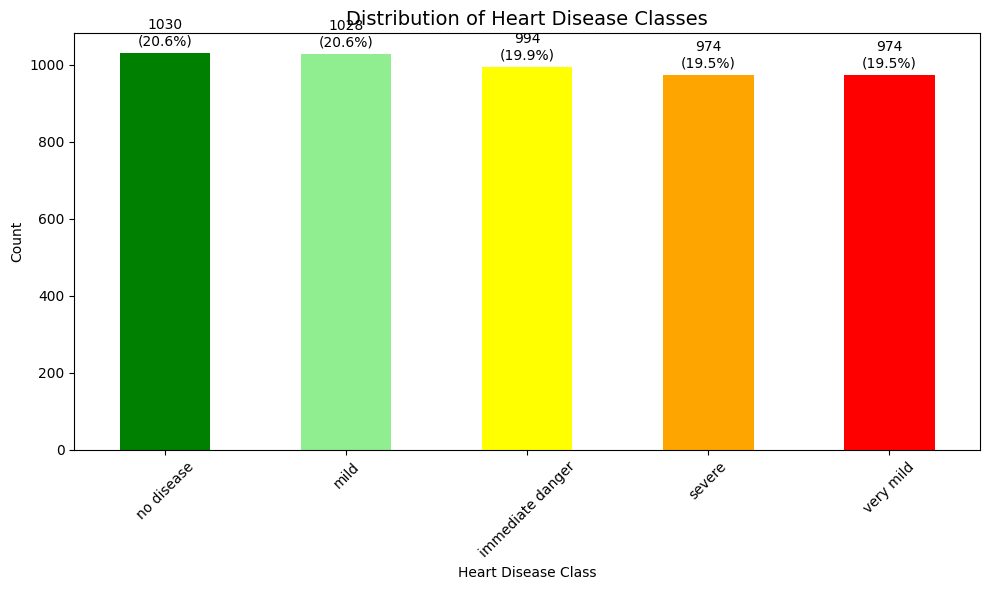

In [13]:
#Bar plot of class distribution
plt.figure(figsize=(10, 6))
ax = class_counts.plot(kind='bar', color=['green', 'lightgreen', 'yellow', 'orange', 'red'])
plt.title('Distribution of Heart Disease Classes', fontsize=14)
plt.xlabel('Heart Disease Class')
plt.ylabel('Count')
for i, (count, pct) in enumerate(zip(class_counts, class_percentages)):
    ax.text(i, count + 20, f'{count}\n({pct:.1f}%)', ha='center')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>CELL 14 VISUALIZATION 2: Correlation heatmap</h2>

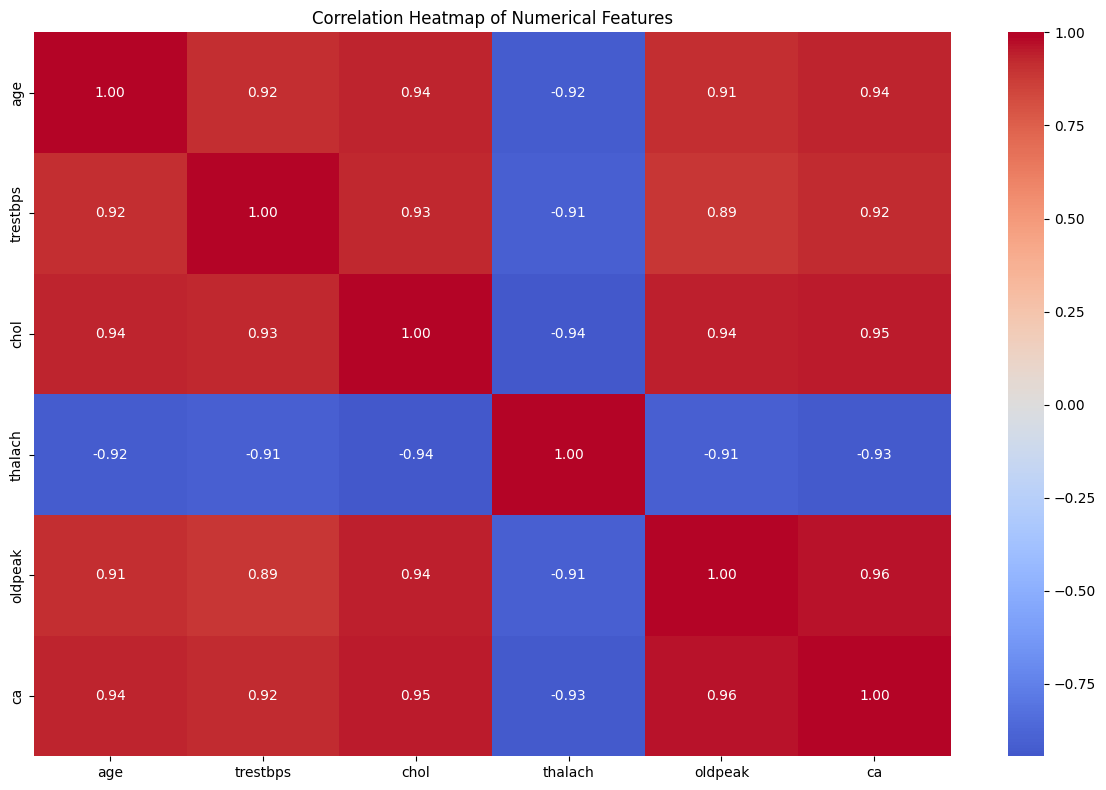

In [14]:
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

<h2>CELL 15 VISUALIZATION 3: Age distribution across classes</h2>

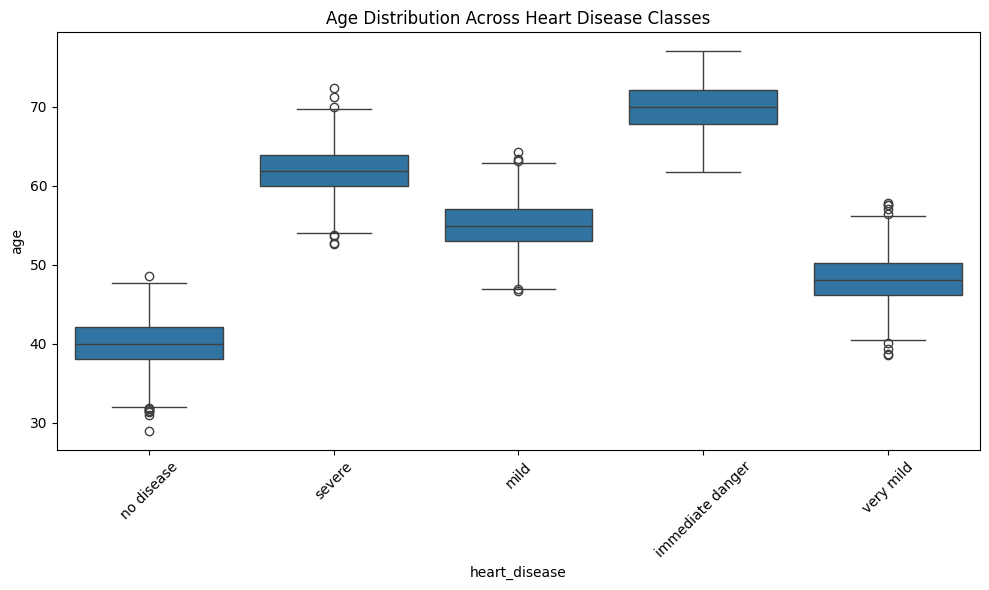

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_disease', y='age', data=df)
plt.title('Age Distribution Across Heart Disease Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>CELL 16 VISUALIZATION 4: Cholesterol distribution across classes</h2>

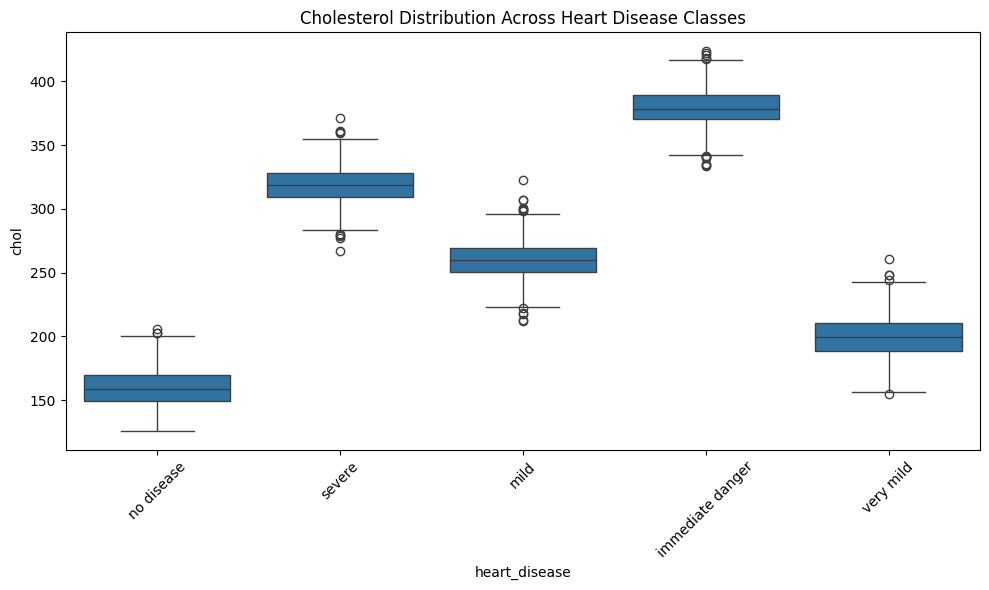

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_disease', y='chol', data=df)
plt.title('Cholesterol Distribution Across Heart Disease Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>CELL 17 VISUALIZATION 5: Missing values bar chart</h2>

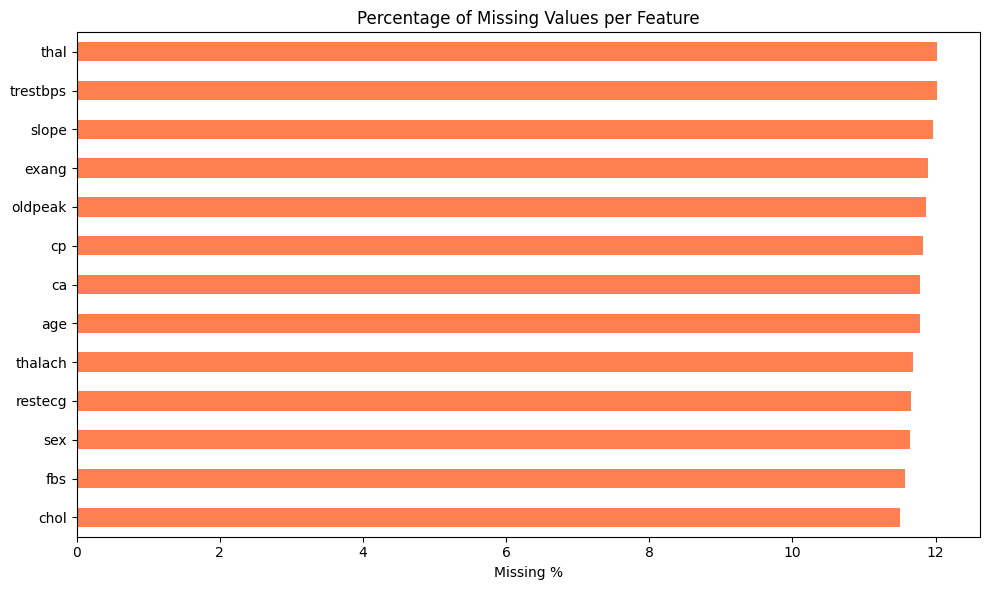

In [17]:
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=True)

if len(missing_pct) > 0:
    plt.figure(figsize=(10, 6))
    missing_pct.plot(kind='barh', color='coral')
    plt.title('Percentage of Missing Values per Feature')
    plt.xlabel('Missing %')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

<h1>PART 3 DATA PREPROCESSING</h1>

<h2>CELL 18 Separate features and target</h2>

In [18]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

<h2>CELL 19 train-test split with stratification</h2>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

Training samples: 4000 (80.0%)
Testing samples: 1000 (20.0%)


<h2>CELL 20 Verify stratification</h2>

In [20]:
original_dist = (y.value_counts(normalize=True) * 100).round(2)
train_dist = (y_train.value_counts(normalize=True) * 100).round(2)
test_dist = (y_test.value_counts(normalize=True) * 100).round(2)

stratification_df = pd.DataFrame({
    'Original (%)': original_dist,
    'Train (%)': train_dist,
    'Test (%)': test_dist
})
print("Stratification Verification:")
stratification_df

Stratification Verification:


,Original (%),Train (%),Test (%)
heart_disease,,,
no disease,20.60,20.60,20.6
mild,20.56,20.58,20.5
immediate danger,19.88,19.88,19.9
severe,19.48,19.48,19.5
very mild,19.48,19.48,19.5


<h2>CELL 21 Identify numerical and categorical features</h2>

In [21]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

Numerical features (6): ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
Categorical features (7): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


<h2>CELL 22 Preprocessing pipelines</h2>

In [22]:
numerical_skewness = X[numerical_features].skew()
print(f"Skewness:\n{numerical_skewness}")

impute_strategy = 'median' if numerical_skewness.abs().mean() > 0.5 else 'mean'

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy=impute_strategy)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

Skewness:
age         0.008038
trestbps   -0.052842
chol        0.130865
thalach    -0.000401
oldpeak     0.734635
ca          0.297753
dtype: float64


<h2>CELL 23 Combine pipelines</h2>

In [23]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

<h2>CELL 24 Fit and transform</h2>

In [24]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print(f"Transformed training shape: {X_train_transformed.shape}")
print(f"Transformed testing shape: {X_test_transformed.shape}")


Transformed training shape: (4000, 25)
Transformed testing shape: (1000, 25)


<h2>CELL 25 Verification checks</h2>

In [25]:
print(f"(a) Training missing values: {np.isnan(X_train_transformed).sum()}")
print(f"(b) Testing missing values: {np.isnan(X_test_transformed).sum()}")
print(f"(c) All features numeric: {np.issubdtype(X_train_transformed.dtype, np.number)}")

(a) Training missing values: 0
(b) Testing missing values: 0
(c) All features numeric: True


<h1>PART 4 Model Training & Evaluation</h1>

<h2>CELL 26 Get feature names after transformation</h2>

In [26]:
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features).tolist()
all_feature_names = numerical_features + cat_feature_names

<h2>CELL 27 Define models and hyperparameter grids and GridSearchCV</h2>

In [38]:


# Define models and hyperparameter grids
models = {
    'MLP': (MLPClassifier(max_iter=1000, random_state=42), {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__alpha': [0.0001, 0.001]
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [5, 10, None]
    }),
    'SVM': (SVC(random_state=42), {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear']
    }),
    'KNN': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5]
    })
}

results = []

for name, (model, params) in models.items():
    print(f"\nTraining {name}...")
    

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    start_time = time.time()
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    training_time = time.time() - start_time
    

    best_cv_accuracy = grid_search.best_score_
    train_accuracy = grid_search.score(X_train, y_train)
    test_accuracy = grid_search.score(X_test, y_test)
    
    print(f"Best params: {grid_search.best_params_}")
    print(f"Best CV Accuracy: {best_cv_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f}s")
    
    results.append({
        'Model': name,
        'Best CV Accuracy': best_cv_accuracy,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Training Time': training_time,
        'Best Estimator': grid_search.best_estimator_
    })



Training MLP...
Best params: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (100,)}
Best CV Accuracy: 0.9983
Training Time: 29.78s

Training Random Forest...
Best params: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Best CV Accuracy: 0.9995
Training Time: 4.44s

Training SVM...
Best params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Best CV Accuracy: 0.9992
Training Time: 1.59s

Training KNN...
Best params: {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Best CV Accuracy: 0.9935
Training Time: 0.93s

Training Gradient Boosting...
Best params: {'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best CV Accuracy: 0.9998
Training Time: 49.67s


<h2>CELL 28 Model Comparison</h2>

In [39]:
comparison_df = pd.DataFrame(results)
comparison_df['Overfitting Gap'] = comparison_df['Train Accuracy'] - comparison_df['Test Accuracy']


def classify_fit(row):
    gap = row['Overfitting Gap']
    if gap > 0.05:
        return 'Overfit'
    elif row['Test Accuracy'] < 0.6:
        return 'Underfit'
    else:
        return 'Best Fit'

comparison_df['Status'] = comparison_df.apply(classify_fit, axis=1)


comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)


display_df = comparison_df[['Model', 'Best CV Accuracy', 'Train Accuracy', 
                            'Test Accuracy', 'Overfitting Gap', 'Status']].round(4)
print("\nModel Comparison:")
display_df



Model Comparison:


,Model,Best CV Accuracy,Train Accuracy,Test Accuracy,Overfitting Gap,Status
1,Random Forest,0.9995,1.0000,1.000,0.0000,Best Fit
4,Gradient Boosting,0.9998,1.0000,0.999,0.0010,Best Fit
2,SVM,0.9992,1.0000,0.997,0.0030,Best Fit
0,MLP,0.9983,0.9998,0.995,0.0048,Best Fit
3,KNN,0.9935,0.9958,0.991,0.0048,Best Fit


<h2>CELL 29 Select best model</h2>

In [41]:
best_row = comparison_df.iloc[0]
best_model_name = best_row['Model']
best_model = best_row['Best Estimator']
best_test_accuracy = best_row['Test Accuracy']

print(f"\n BEST MODEL: {best_model_name}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")


 BEST MODEL: Random Forest
Test Accuracy: 1.0000


<h2>CELL 30 Detailed Evaluation of Best Model and Classification Report</h2>

In [42]:

y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

immediate danger       1.00      1.00      1.00       199
            mild       1.00      1.00      1.00       205
      no disease       1.00      1.00      1.00       206
          severe       1.00      1.00      1.00       195
       very mild       1.00      1.00      1.00       195

        accuracy                           1.00      1000
       macro avg       1.00      1.00      1.00      1000
    weighted avg       1.00      1.00      1.00      1000



<h2>CELL 31 Confusion Matrix</h2>

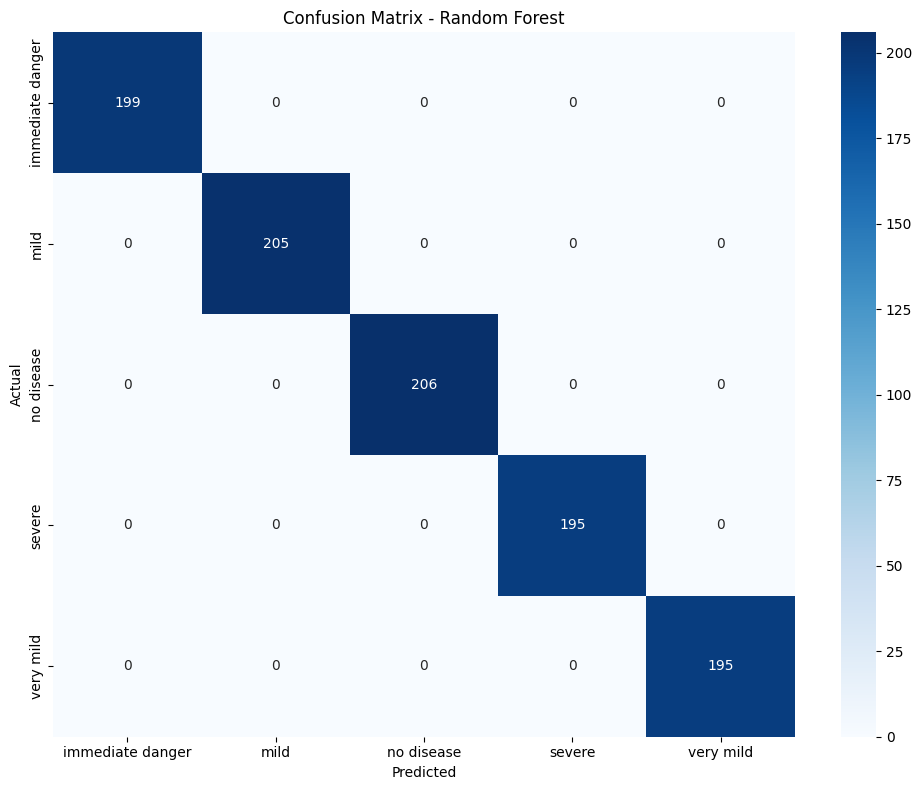

In [43]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
class_names = sorted(y.unique())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

<h2>CELL 32 Per-class analysis</h2>

In [44]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
class_metrics = {k: v for k, v in report_dict.items() if k in class_names}

precisions = {k: v['precision'] for k, v in class_metrics.items()}
recalls = {k: v['recall'] for k, v in class_metrics.items()}

highest_precision_class = max(precisions, key=precisions.get)
lowest_recall_class = min(recalls, key=recalls.get)

print(f"Highest Precision: {highest_precision_class} ({precisions[highest_precision_class]:.4f})")
print(f"Lowest Recall: {lowest_recall_class} ({recalls[lowest_recall_class]:.4f})")
print(f"\nClinical Interpretation:")
print(f"- High precision in '{highest_precision_class}' means fewer false positives for this class")
print(f"- Low recall in '{lowest_recall_class}' means the model misses some actual cases of this class")

Highest Precision: immediate danger (1.0000)
Lowest Recall: immediate danger (1.0000)

Clinical Interpretation:
- High precision in 'immediate danger' means fewer false positives for this class
- Low recall in 'immediate danger' means the model misses some actual cases of this class


<h2> CELL 32 Feature Importance</h2>

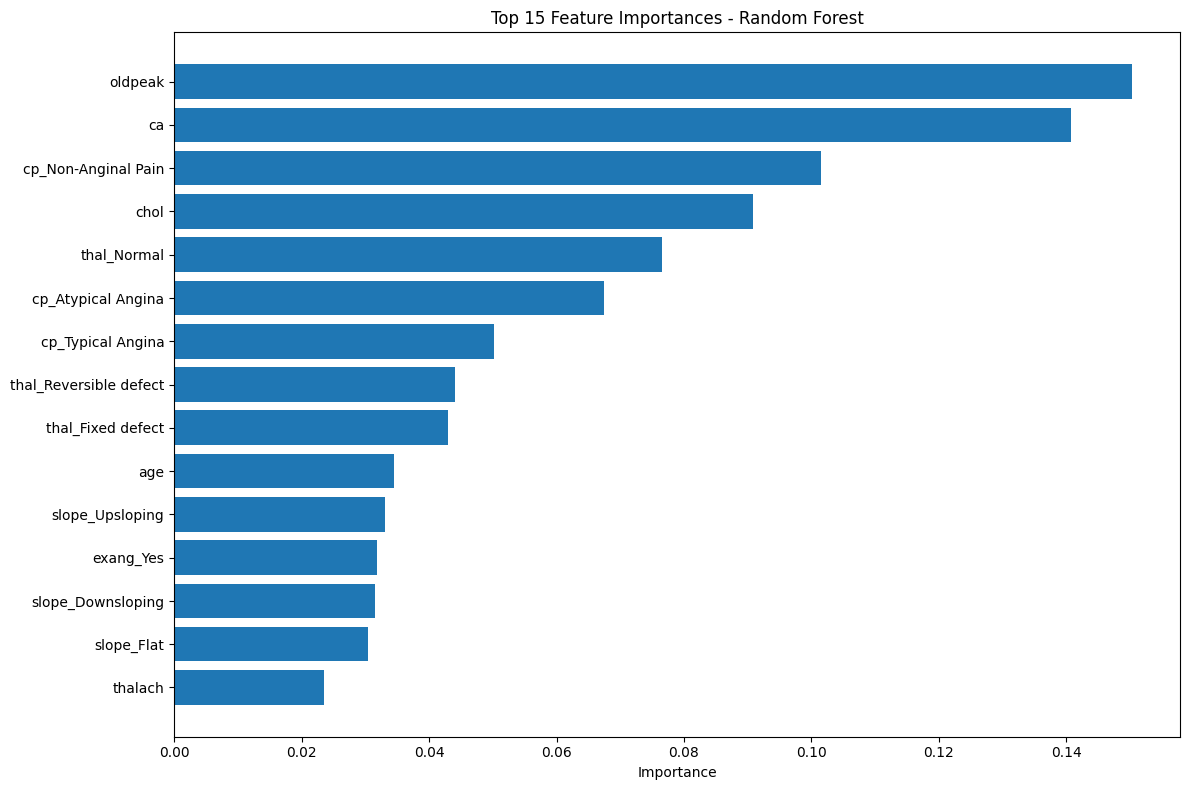

In [46]:
import os
os.makedirs('deployment', exist_ok=True)

classifier = best_model.named_steps['classifier']
if hasattr(classifier, 'feature_importances_'):
    importances = classifier.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
else:
    print(f"{best_model_name} does not support feature_importances_")

<h2>CELL 33 Save the best model</h2>

In [48]:
joblib.dump(best_model, 'deployment/best_model.pkl')
print("Model saved to deployment/best_model.pkl")

# Save feature columns
with open('deployment/feature_columns.txt', 'w') as f:
    for col in X.columns:
        f.write(f"{col}\n")
print("Feature columns saved")

# Save class names
with open('deployment/class_names.txt', 'w') as f:
    for cls in sorted(y.unique()):
        f.write(f"{cls}\n")
print("Class names saved")

Model saved to deployment/best_model.pkl
Feature columns saved
Class names saved


<h2>CELL 34 Verification 1: Test on random samples</h2>

In [50]:
loaded_model = joblib.load('deployment/best_model.pkl')
random_indices = np.random.choice(len(X_test), 5, replace=False)
X_sample = X_test.iloc[random_indices]
y_actual = y_test.iloc[random_indices]
y_predicted = loaded_model.predict(X_sample)

verification_df = pd.DataFrame({
    'Index': random_indices,
    'Actual': y_actual.values,
    'Predicted': y_predicted
})
print("Verification 1 - Random Test Samples:")
verification_df

Verification 1 - Random Test Samples:


,Index,Actual,Predicted
0,699,mild,mild
1,758,severe,severe
2,87,mild,mild
3,525,immediate danger,immediate danger
4,259,very mild,very mild


<h2>CELL 35 Verification 2: Custom new patient samples</h2>

In [51]:
new_patients = pd.DataFrame([
    {'age': 45, 'sex': 'Male', 'cp': 'Typical Angina', 'trestbps': 120, 
     'chol': 200, 'fbs': False, 'restecg': 'Normal', 'thalach': 150,
     'exang': 'No', 'oldpeak': 0.5, 'slope': 'Upsloping', 'ca': 0, 'thal': 'Normal'},
    {'age': 65, 'sex': 'Female', 'cp': 'Asymptomatic', 'trestbps': 160,
     'chol': 350, 'fbs': True, 'restecg': 'LV hypertrophy', 'thalach': 110,
     'exang': 'Yes', 'oldpeak': 3.5, 'slope': 'Downsloping', 'ca': 2, 'thal': 'Reversible defect'},
    {'age': 35, 'sex': 'Male', 'cp': 'Non-Anginal Pain', 'trestbps': 110,
     'chol': 180, 'fbs': False, 'restecg': 'Normal', 'thalach': 175,
     'exang': 'No', 'oldpeak': 0.2, 'slope': 'Upsloping', 'ca': 0, 'thal': 'Normal'}
])

predictions = loaded_model.predict(new_patients)
probabilities = loaded_model.predict_proba(new_patients) if hasattr(loaded_model, 'predict_proba') else None

verification2_df = new_patients.copy()
verification2_df['Predicted Class'] = predictions
if probabilities is not None:
    for i, cls in enumerate(loaded_model.classes_):
        verification2_df[f'Prob_{cls}'] = probabilities[:, i].round(4)

print("Verification 2 - Custom Patient Predictions:")
verification2_df


Verification 2 - Custom Patient Predictions:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predicted Class,Prob_immediate danger,Prob_mild,Prob_no disease,Prob_severe,Prob_very mild
0,45,Male,Typical Angina,120,200,False,Normal,150,No,0.5,Upsloping,0,Normal,no disease,0.00,0.0000,1.00,0.0000,0.0
1,65,Female,Asymptomatic,160,350,True,LV hypertrophy,110,Yes,3.5,Downsloping,2,Reversible defect,immediate danger,0.81,0.0001,0.00,0.1899,0.0
2,35,Male,Non-Anginal Pain,110,180,False,Normal,175,No,0.2,Upsloping,0,Normal,no disease,0.00,0.2200,0.78,0.0000,0.0
